Write a program using tensorflow to calculate : 
    $$y=mx+c$$

### Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=sum((x-mean(x))^2)$$
4. Calculate covariance of x & y
    $$covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))$$
5. Calculate value of c
    $$c = covariance(x,y)/variance(x)$$
6. Calculate value of m
    $$m = mean(y) -c* mean(x)$$
    

In [3]:
import tensorflow as tf

In [57]:
with tf.name_scope("mean_x"):
        a=tf.constant([8.0,6.0,30.2,27.02,9.8,6.7],shape=[1,6],name='a')
      
        x=tf.reduce_mean(a)
        sess=tf.Session()
print("mean of X=",sess.run(x))

mean of X= 14.62


In [58]:
import tensorflow as tf

x1=tf.constant([8.0,6.0,30.2,27.02,9.8,6.7])

s=tf.constant(0)

with tf.name_scope("Mean_of_X"):
    with tf.Session() as sess:
        for i in range (len(sess.run(x1))):
            output=sess.run(x1[i])
            s=tf.add(s,output,name="add_values_of_x")
        c=tf.divide(s,len(sess.run(x1)), name="divide")
        avgx=sess.run(c)
    print('Mean of X=',avgx)
    


Mean of X= 14.3333333333


In [60]:
y1=tf.constant([17.0,9.0,19.5,1.0,15.6,6.8])
with tf.name_scope("mean_y"):
    b=tf.constant([17.0,9.0,19.5,1.0,15.6,6.8],shape=[1,6],name='b')
    y=tf.reduce_mean(b)
    sess=tf.Session()
print("mean of Y=",sess.run(y))

mean of Y= 11.4833


In [61]:
y1=tf.constant([17.0,9.0,19.5,1.0,15.6,6.8])
s1=tf.constant(0)
with tf.name_scope("Mean_of_Y"):
    with tf.Session() as sess:
        for i in range (len(sess.run(y1))):
            output=sess.run(y1[i])
            s1=tf.add(s1,output)
        d=tf.divide(s1,len(sess.run(y1)), name="Divide")
        avgy=sess.run(d)
    print('Mean of Y=',avgy)

Mean of Y= 11.1666666667


In [62]:
#variance of x
var=tf.constant(0.0)

with tf.name_scope("variance"):
    with tf.Session() as sess:
        for i in range (len(sess.run(x1))):
            a1=tf.subtract(sess.run(x1[i]), avgx)
            b1=tf.square(a1)
            var=tf.add(var,b1)
        varianc=sess.run(var)
    print("Variance=",varianc)

Variance= 601.077


In [63]:
#covarience of x and y
cov=tf.constant(0.0)
with tf.name_scope("cov"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x1))):
            e=tf.subtract(sess.run(x1[i]),avgx)
            f=tf.subtract(sess.run(y1[i]),avgy)
            g=tf.multiply(e,f)
            cov=tf.add(cov,g)
        covr=sess.run(cov)
print("Coveriance of X,Y=",covr)
            

Coveriance of X,Y= -2.41334


In [64]:
#Value of c(constant)
with tf.name_scope("Value_of_c"):
    with tf.Session() as sess:
        t=tf.divide(cov,var)
        c_value=sess.run(t)
        print("Value of C=",c_value)

Value of C= -0.00401502


In [65]:
#Value of m(slope)
with tf.name_scope("Value_of_m"):
    h=tf.to_float(c_value)
    i=tf.to_float(avgx)
    j=tf.multiply(h,i)
    k=tf.to_float(avgy)
    m=tf.subtract(k,j)
    with tf.Session() as sess:
        m=sess.run(k)
print("Value of slope(M)=",m)


Value of slope(M)= 11.1667


### Part 2

1. Plot graph for actual values against predicted value
2. Calculate root mean square error.

In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

with tf.Session() as sess:
    x_grp=sess.run(x1)
    y_grp=sess.run(y1)
train_x=np.asarray(x_grp)
train_y=np.asarray(y_grp)

x_plot=tf.constant([8.0,6.0,30.2,27.02,9.8,6.7])
with tf.Session() as sess:
    x1_plot=sess.run(x_plot)
x2_plot=np.asarray(x1_plot)

y_plot=[0]*6

with tf.Session() as sess:
    for i in range (len(sess.run(x_plot))):
        output=sess.run(x_plot[i])
        l=tf.multiply(output,m)
        n=tf.add(l,c_value)
        y_plot[i]=sess.run(n)
print (y_plot)


[89.329323, 66.995987, 337.22931, 301.71933, 109.42933, 74.812653]


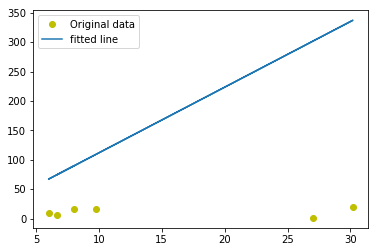

In [88]:
plt.plot(train_x,train_y,'yo',label='Original data')
plt.plot(x2_plot,y_plot, label='fitted line')
plt.legend()
plt.show()